In [63]:
#Import numpy library for logical algebra
import numpy as np
#import pandas library for read.csv
import pandas as pd 
import matplotlib.pyplot as plt

#create bar chart
import seaborn as sns


data = pd.read_csv('Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
#Data Exploration
#Summary statistics 

print(data.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [34]:
#No. of rows and columns 
data.shape

(7043, 21)

In [35]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
#Data Cleaning
#Check for any missing values 
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
#remove the customerID column as it doesnt contribute valuable information 
del data['customerID']

In [19]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [97]:
#convert total charges  to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors ='coerce')

In [98]:
print(data['TotalCharges'].dtype) #has been converted to float

float64


In [23]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [24]:
data.isnull().sum() #Check again to see if there are any missing values

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
data.dropna(subset=['TotalCharges'], inplace = True)
print(data)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [29]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
#Convert senior citizen values
data["SeniorCitizen"] = data["SeniorCitizen"].replace(1, "Yes")
data["SeniorCitizen"] = data["SeniorCitizen"].replace(0, "No")

In [31]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


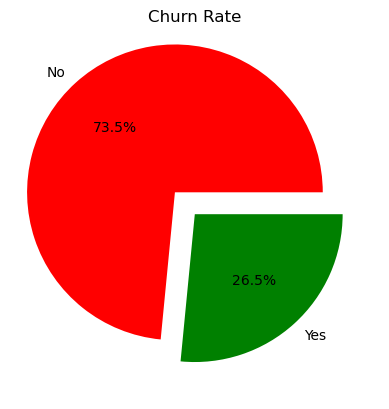

In [60]:
#Overall churn rate 
churn = data['Churn'].value_counts()
pie_explode = [0.2, 0]
mycolors = ["red", "green"]

plt.pie(churn.values, labels = churn.index, autopct="%1.1f%%", explode = pie_explode, colors = mycolors )

plt.title("Churn Rate")
plt.show()


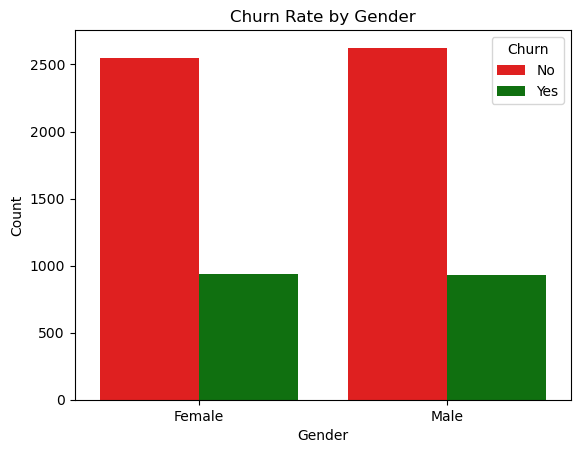

In [70]:
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "gender", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

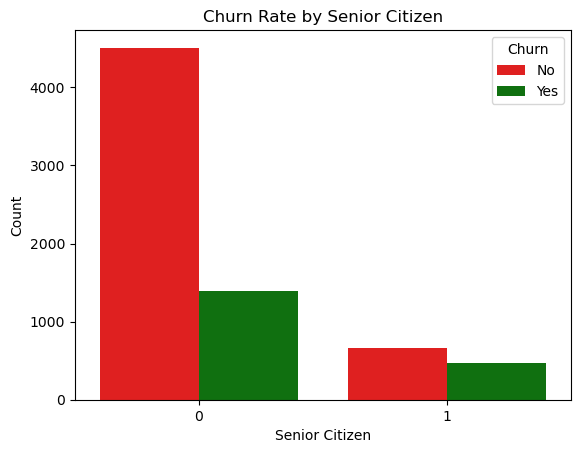

In [71]:
#Create bar chart for seniorCitizen and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "SeniorCitizen", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()

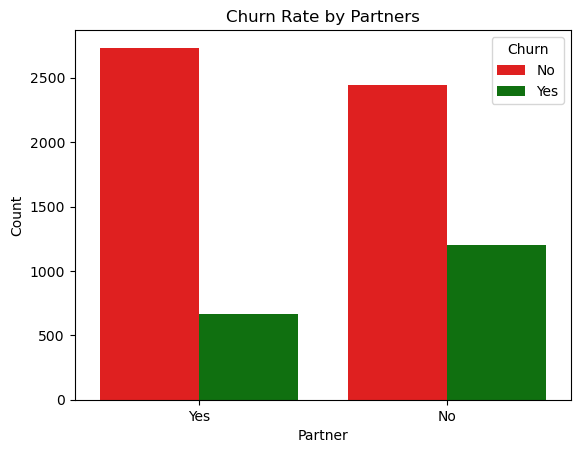

In [72]:
#Create bar chart for Partners and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "Partner", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Partners")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

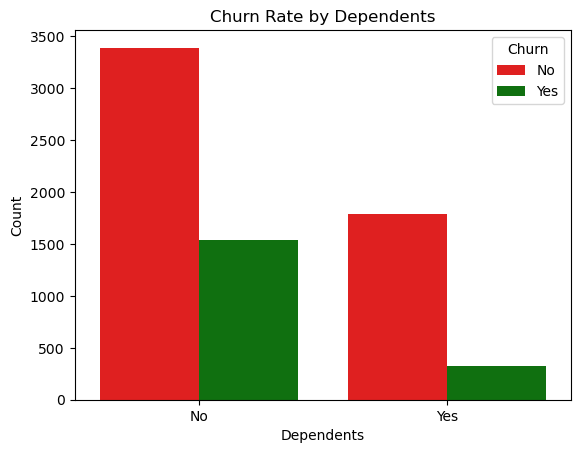

In [74]:
#Create bar chart for Dependents and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "Dependents", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

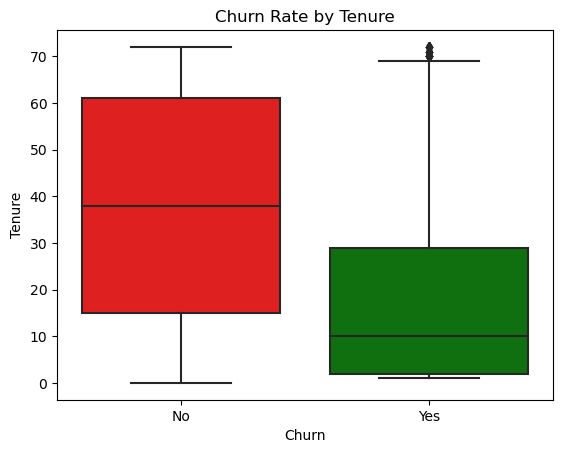

In [78]:
#Create bar chart for tenure and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.boxplot(x = "Churn", y = "tenure", data = data, palette = custom_palette)

plt.title("Churn Rate by Tenure")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

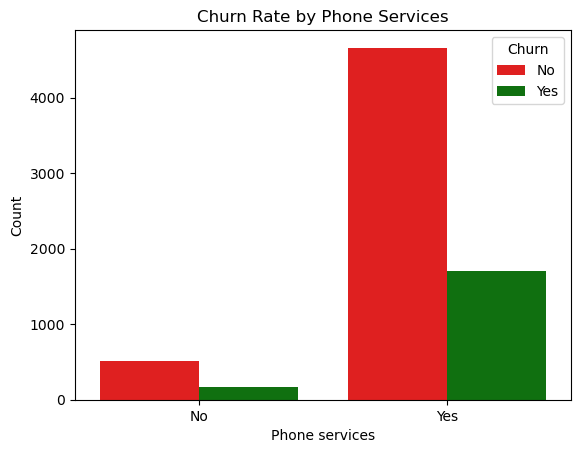

In [79]:
#Create bar chart for Phone servies and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "PhoneService", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Phone Services")
plt.xlabel("Phone services")
plt.ylabel("Count")
plt.show()

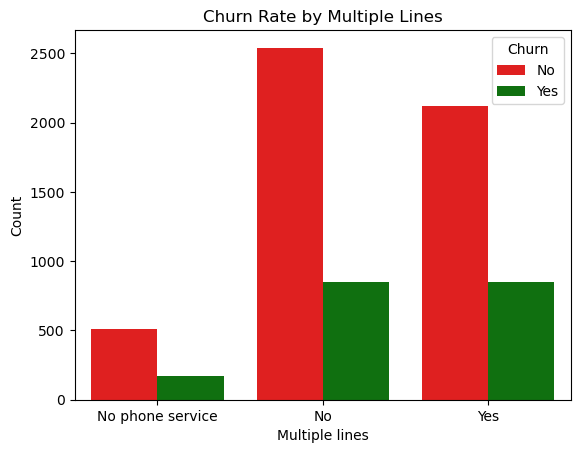

In [81]:
#Create bar chart for Multiple lines and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "MultipleLines", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Multiple Lines")
plt.xlabel("Multiple lines")
plt.ylabel("Count")
plt.show()

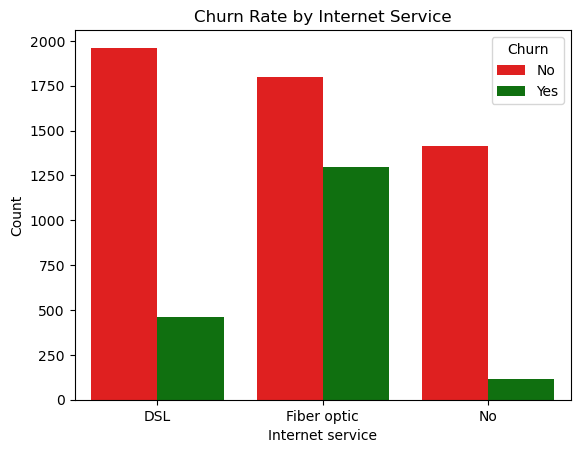

In [82]:
#Create bar chart for Internet service and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "InternetService", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Internet Service")
plt.xlabel("Internet service")
plt.ylabel("Count")
plt.show()

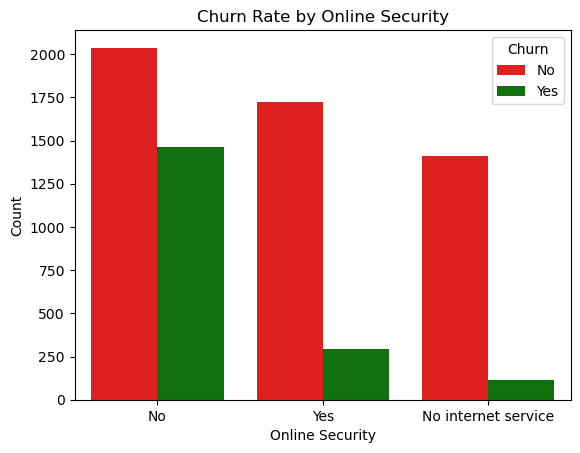

In [83]:
#Create bar chart for Online security and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "OnlineSecurity", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Online Security")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.show()

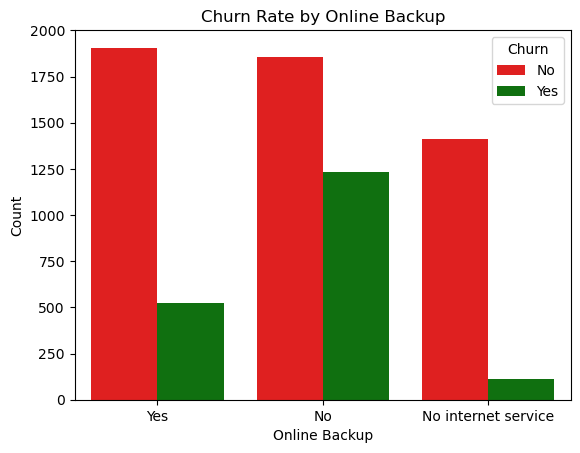

In [84]:
#Create bar chart for Online backup and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "OnlineBackup", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Online Backup")
plt.xlabel("Online Backup")
plt.ylabel("Count")
plt.show()

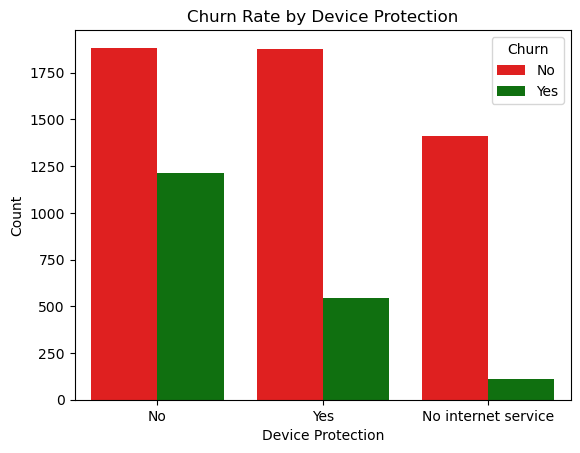

In [85]:
#Create bar chart for Device Protection and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "DeviceProtection", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Device Protection")
plt.xlabel("Device Protection")
plt.ylabel("Count")
plt.show()

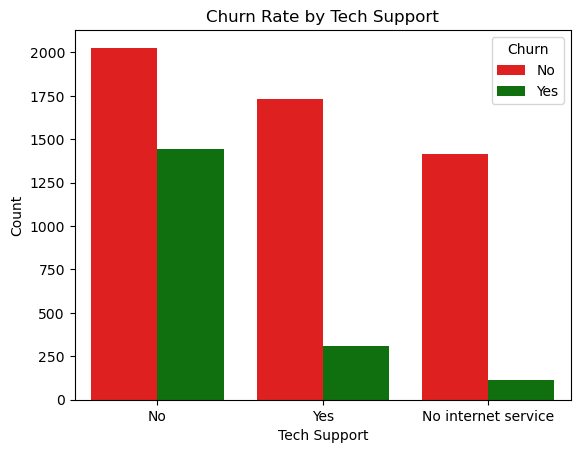

In [86]:
#Create bar chart for Tech support and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "TechSupport", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Tech Support")
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.show()

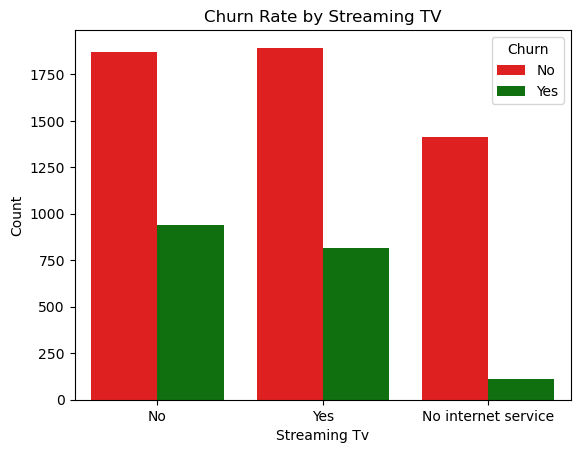

In [87]:
#Create bar chart for Streaming Tv and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "StreamingTV", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Streaming TV")
plt.xlabel("Streaming Tv")
plt.ylabel("Count")
plt.show()

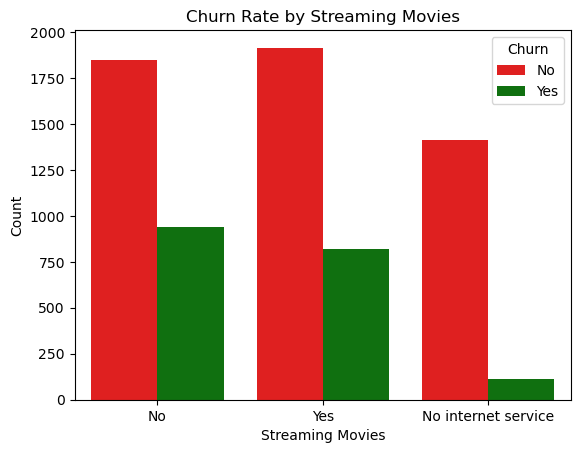

In [88]:
#Create bar chart for Streaming Movies and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "StreamingMovies", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Streaming Movies")
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.show()

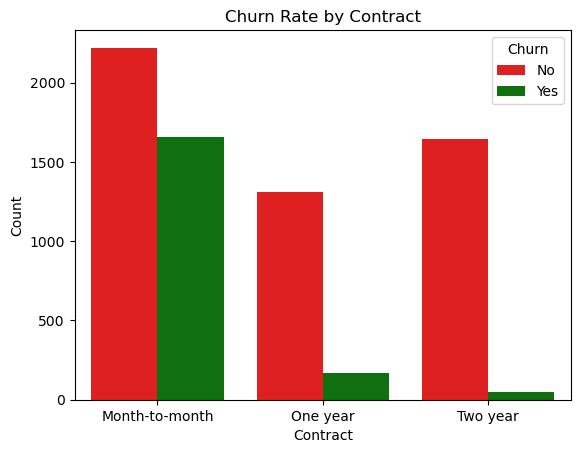

In [89]:
#Create bar chart for seniorCitizen and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "Contract", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Contract")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.show()

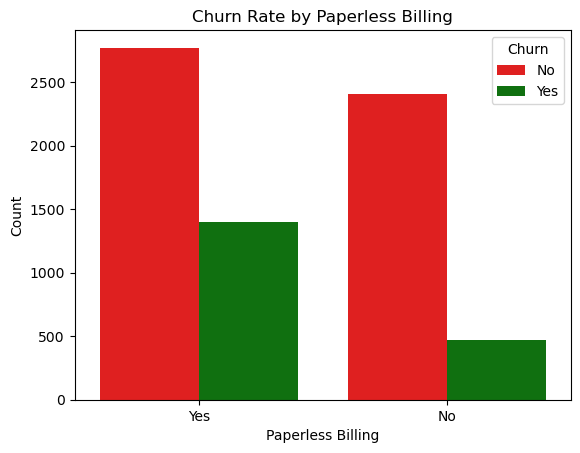

In [90]:
#Create bar chart for Paperless Billing and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "PaperlessBilling", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Paperless Billing")
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.show()

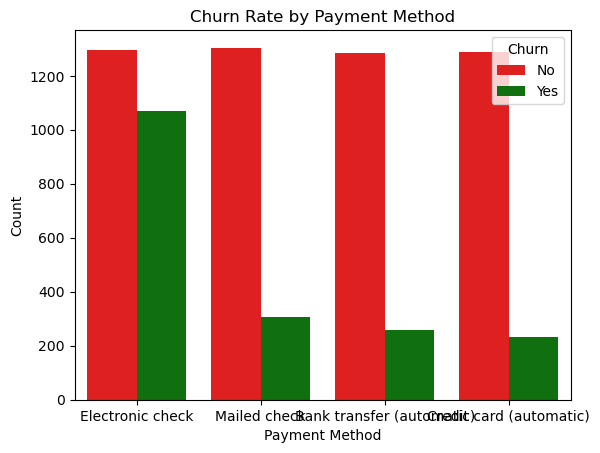

In [91]:
#Create bar chart for Payment Method and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "PaymentMethod", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

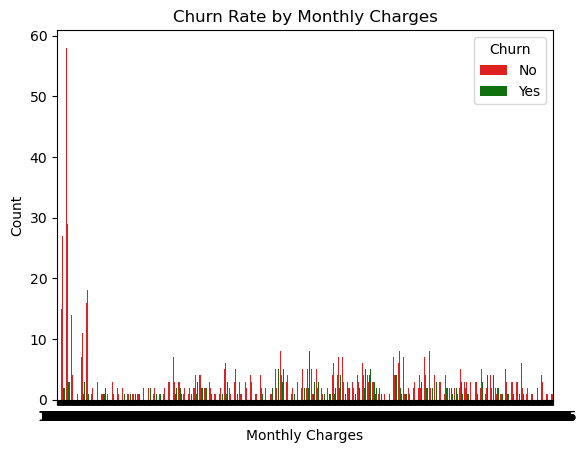

In [92]:
#Create bar chart for Monthly Charges and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.countplot(x = "MonthlyCharges", hue = "Churn", data = data, palette = custom_palette)

plt.title("Churn Rate by Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

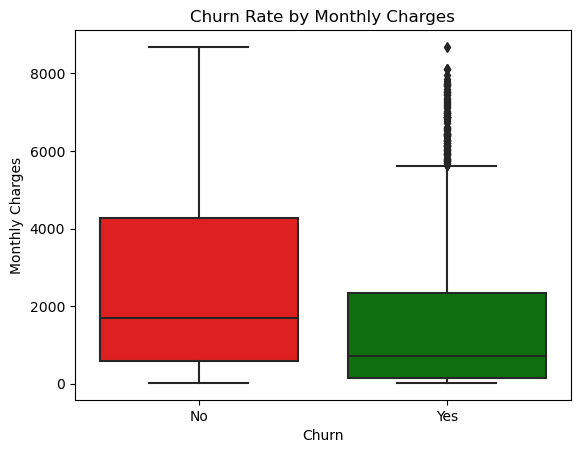

In [101]:
#Create bar chart for Monthly Charges and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.boxplot(x = "Churn", y = "TotalCharges", data = data, palette = custom_palette)

plt.title("Churn Rate by Monthly Charges")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

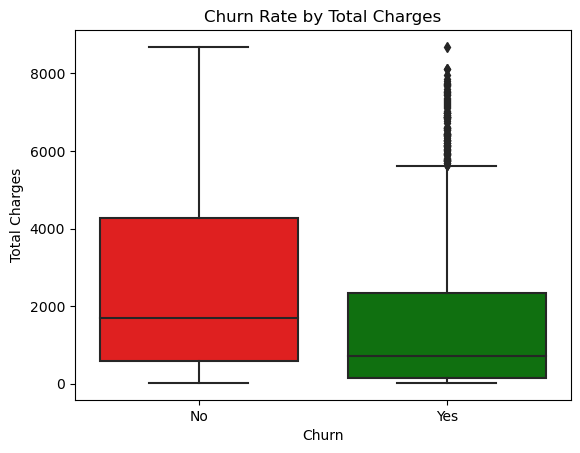

In [99]:
#Create bar chart for Total charges and churn 
custom_palette = {"Yes": "green", "No": "red" }
sns.boxplot(x = "Churn", y = "TotalCharges", data = data, palette = custom_palette)

plt.title("Churn Rate by Total Charges")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()